In [2]:
import copy
import random
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)    
matplotlib.rcParams['axes.unicode_minus'] = False      
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 150)

from xgboost import XGBRegressor

import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
torch.set_printoptions(sci_mode=False)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device

random_seed = 616

### 기본 데이터

In [3]:
y_col = '유입량'
PK_col = ['홍수사상번호','연','월','일','시간']

In [4]:
data_raw = pd.read_excel('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx', header=[0,1])

In [5]:
data = data_raw.copy()
data.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in data.columns.values]

In [6]:
train = data.dropna()
test = data[data.isna().any(axis=1)]

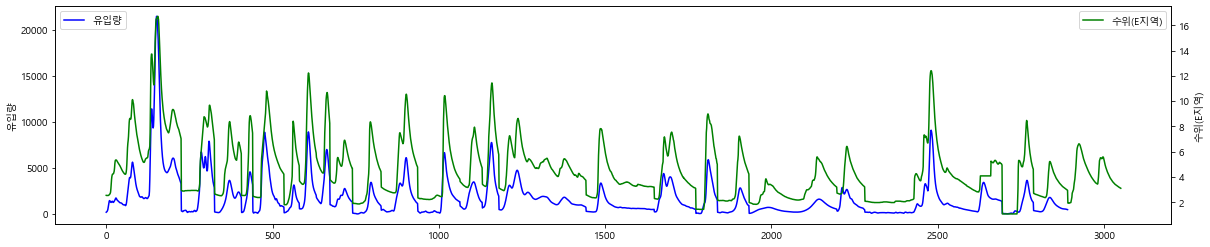

In [7]:
col_list = ['유입량','수위\(E지역\)']

n = len(col_list)
fig, ax1 = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(20)
data.유입량.plot(ax=ax1, color='blue', label='유입량')
ax2 = ax1.twinx()
data["데이터집단 1_수위(E지역)"].plot(ax=ax2, color='green', label='수위(E지역)')
ax1.set_ylabel('유입량')
ax2.set_ylabel('수위(E지역)')
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

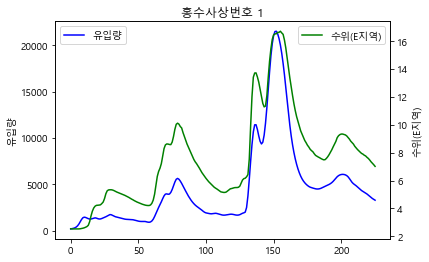

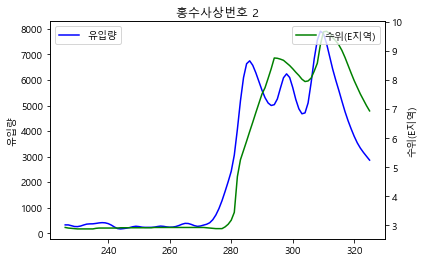

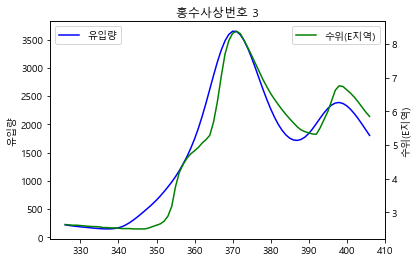

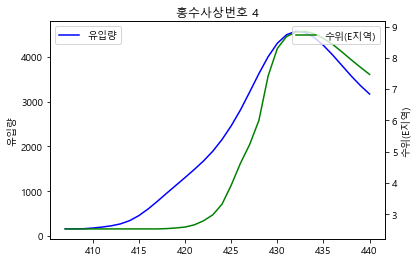

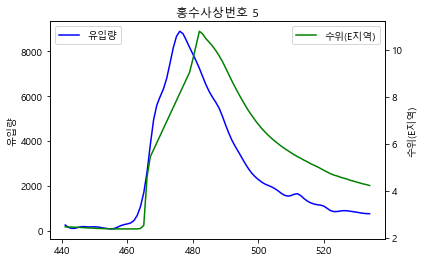

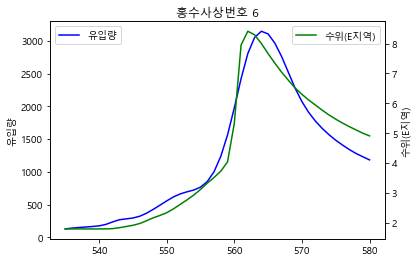

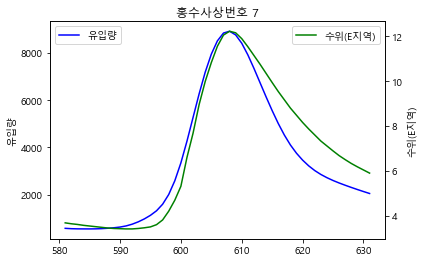

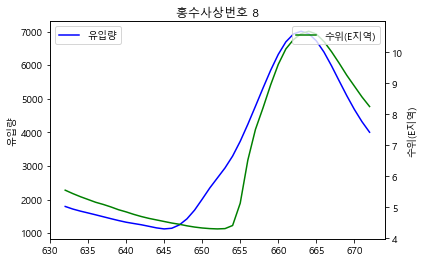

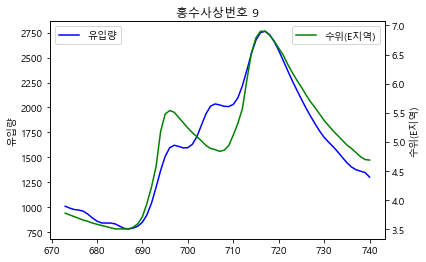

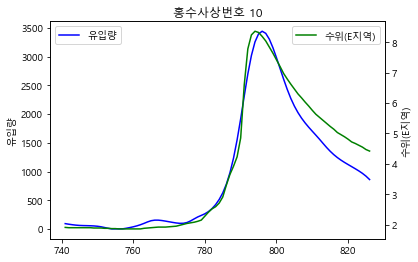

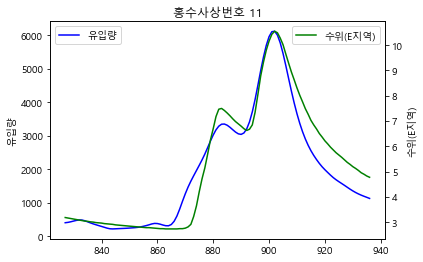

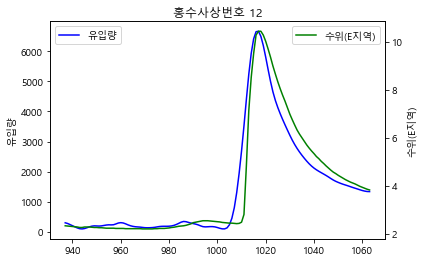

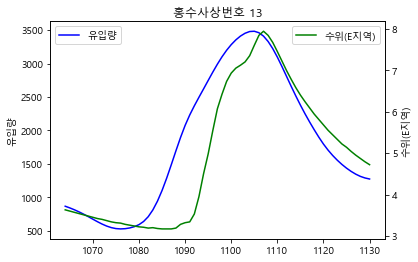

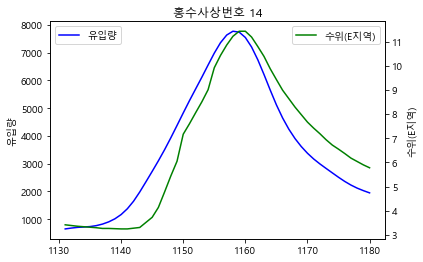

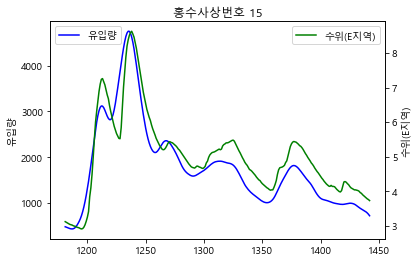

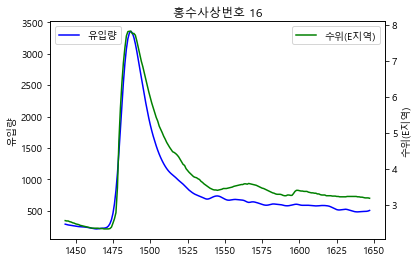

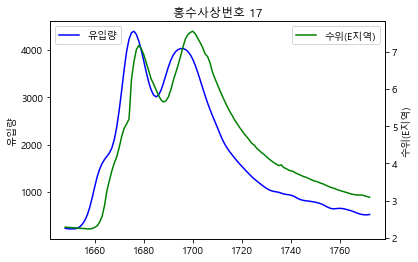

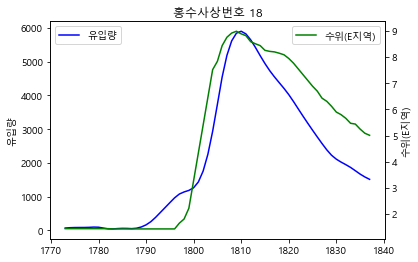

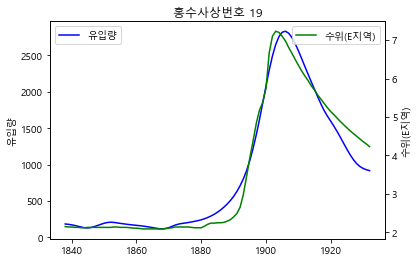

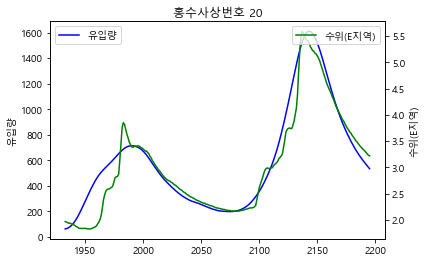

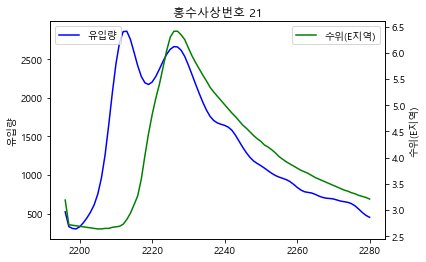

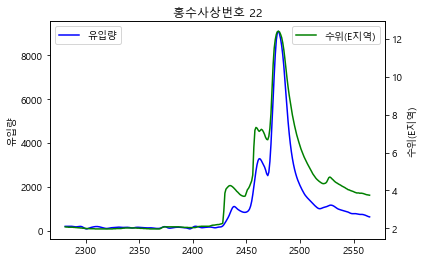

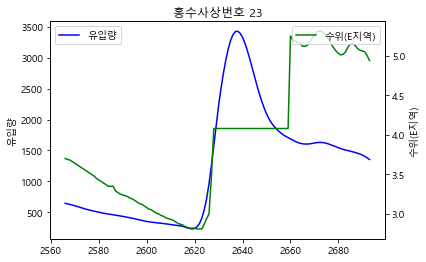

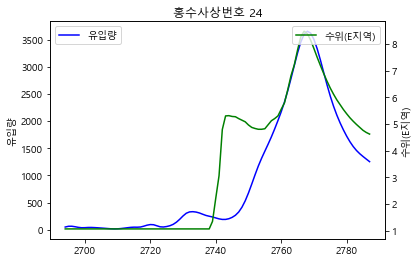

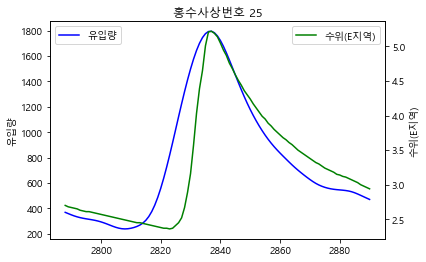

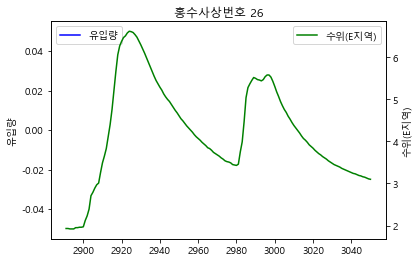

In [8]:
col_list = ['유입량','수위\(E지역\)']

n = len(col_list)
for num in data.홍수사상번호.unique():
    data_num = data[data.홍수사상번호 == num].copy()
    data_num['수위(E지역)_shift'] = data_num['데이터집단 1_수위(E지역)']
    fig, ax1 = plt.subplots(1,1)
    data_num.유입량.plot(ax=ax1, color='blue', label='유입량')
    ax2 = ax1.twinx()
    data_num["데이터집단 1_수위(E지역)"].plot(ax=ax2, color='green', label='수위(E지역)')
    ax1.set_ylabel('유입량')
    ax2.set_ylabel('수위(E지역)')
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    plt.title(f"홍수사상번호 {num}")
    plt.show()

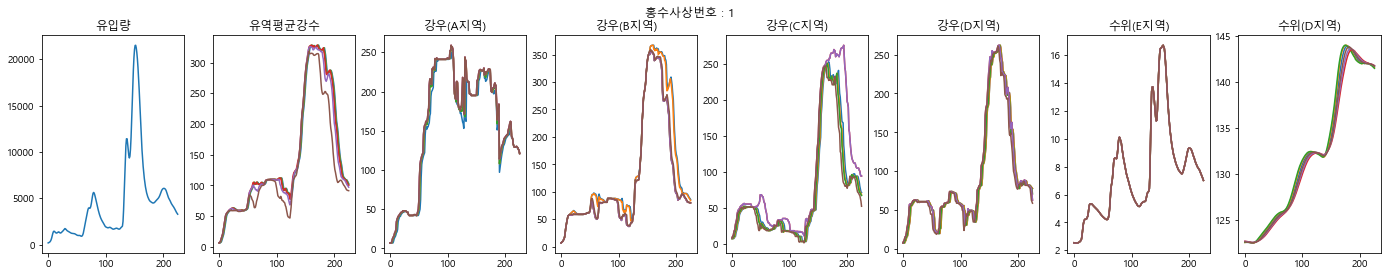

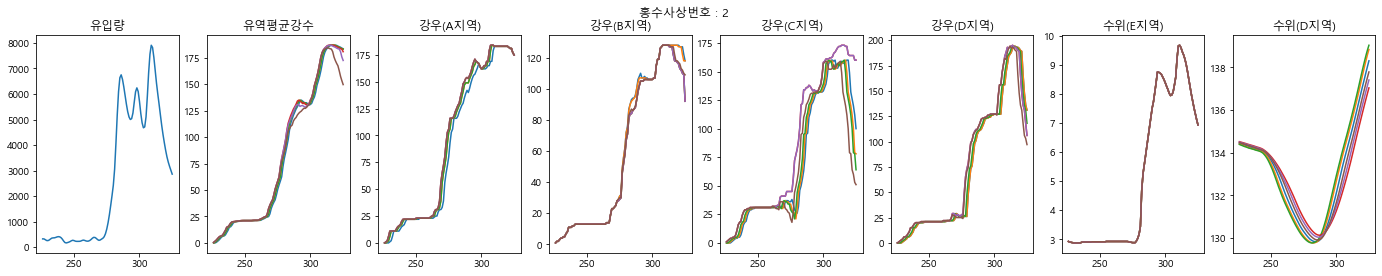

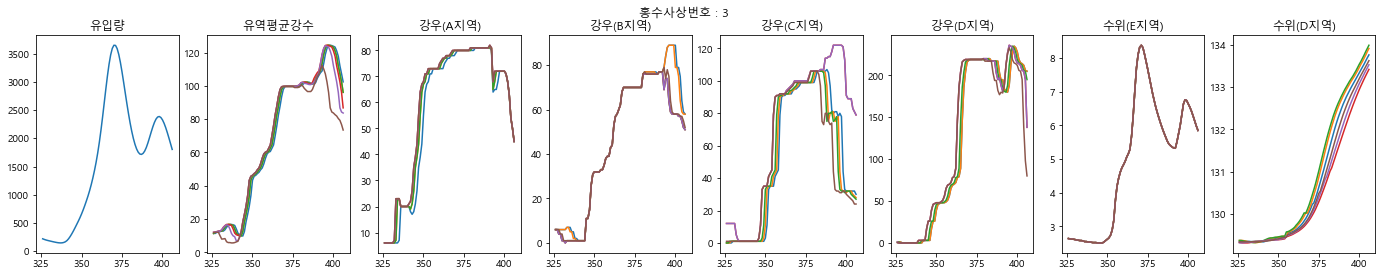

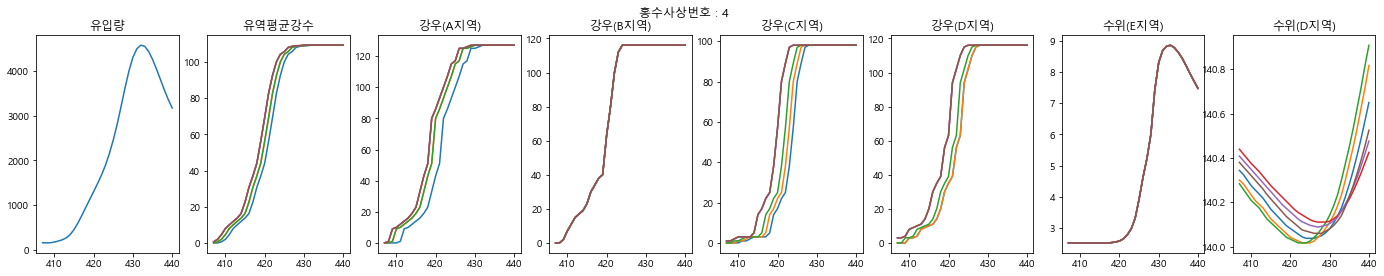

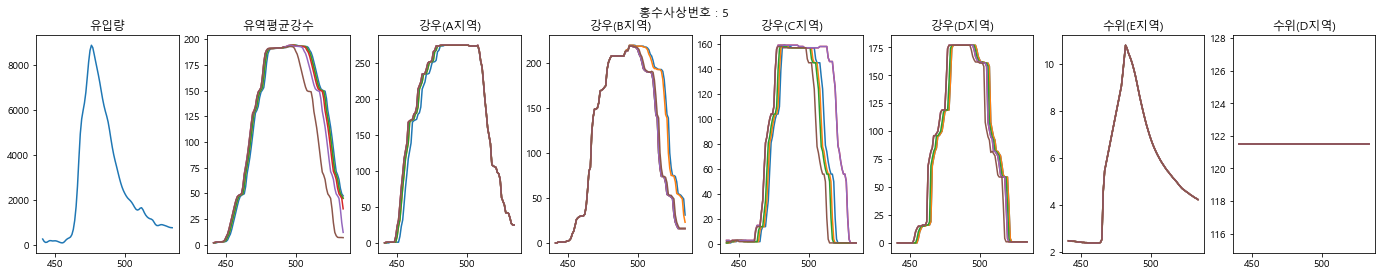

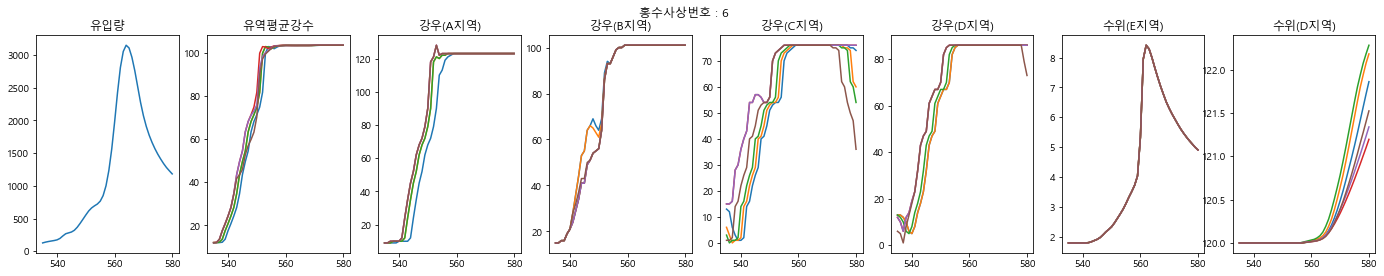

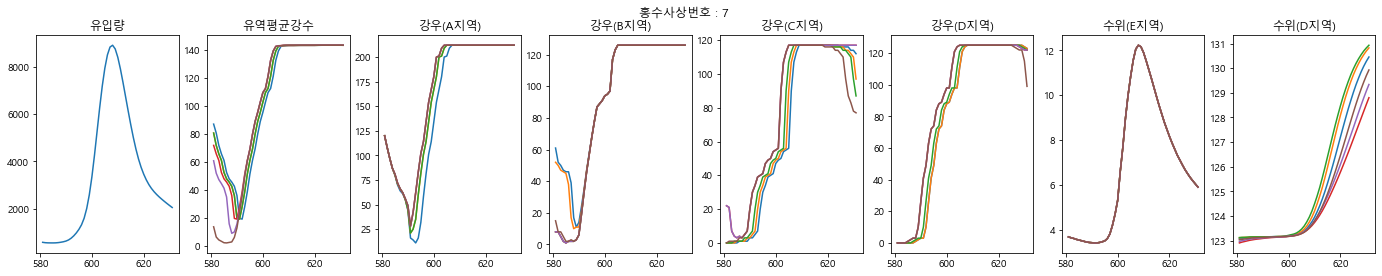

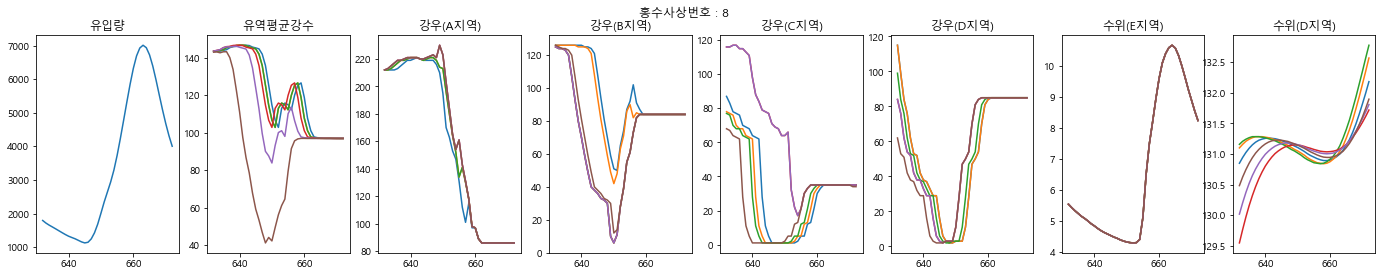

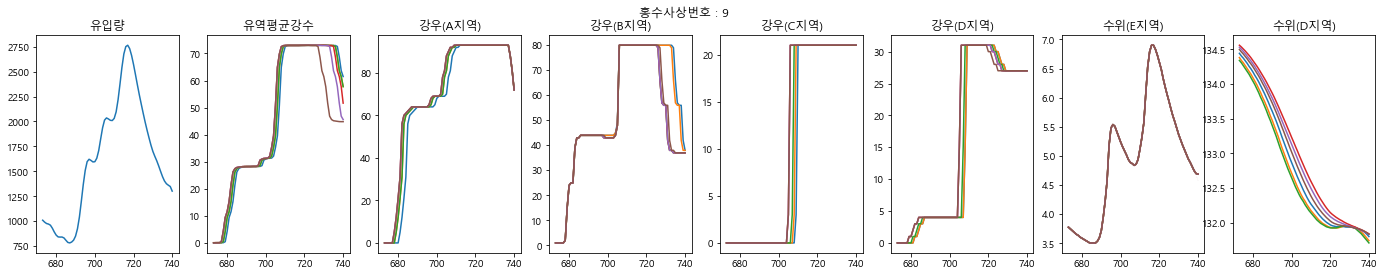

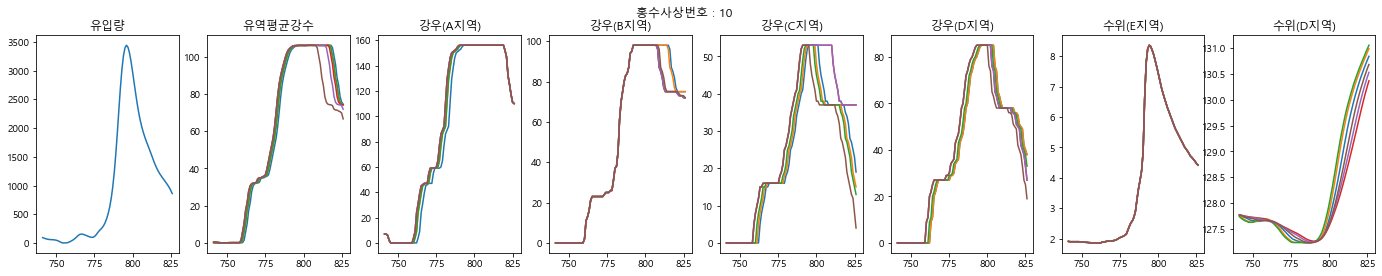

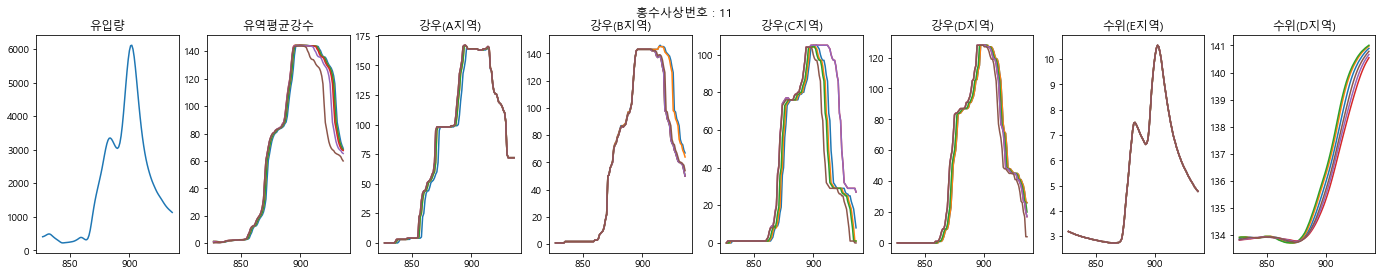

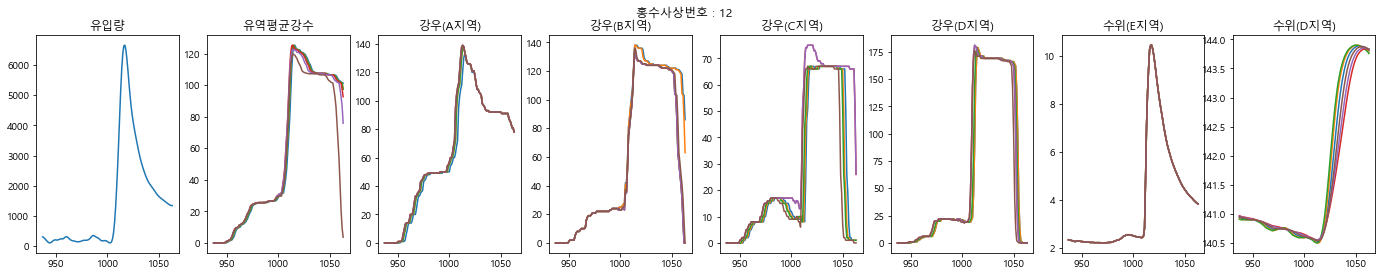

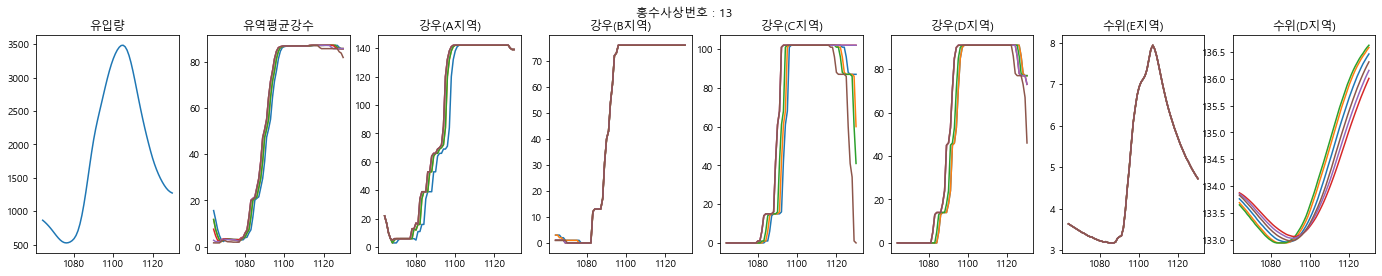

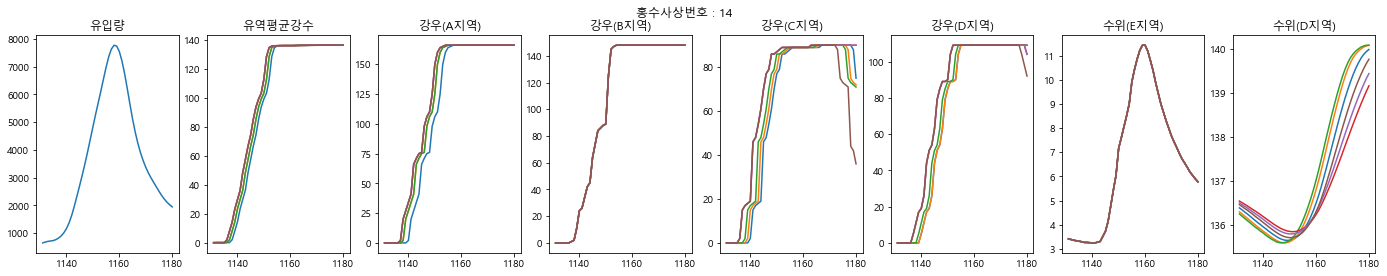

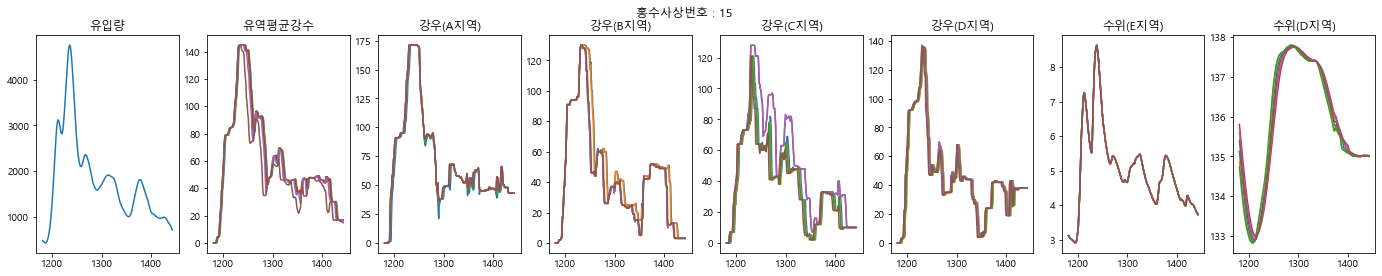

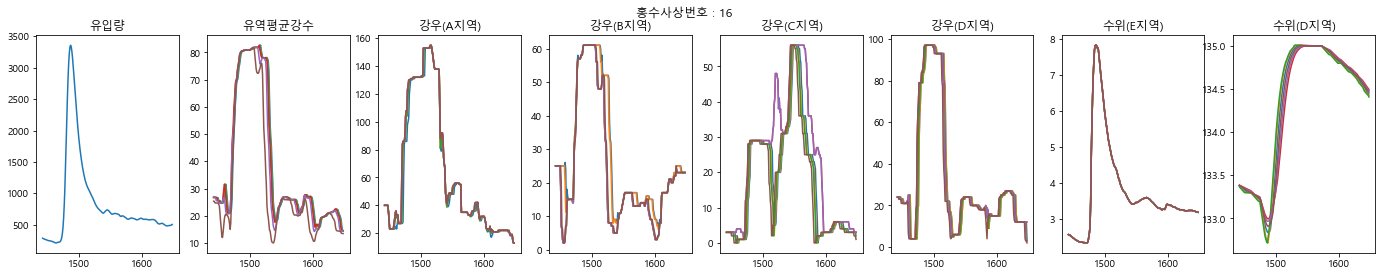

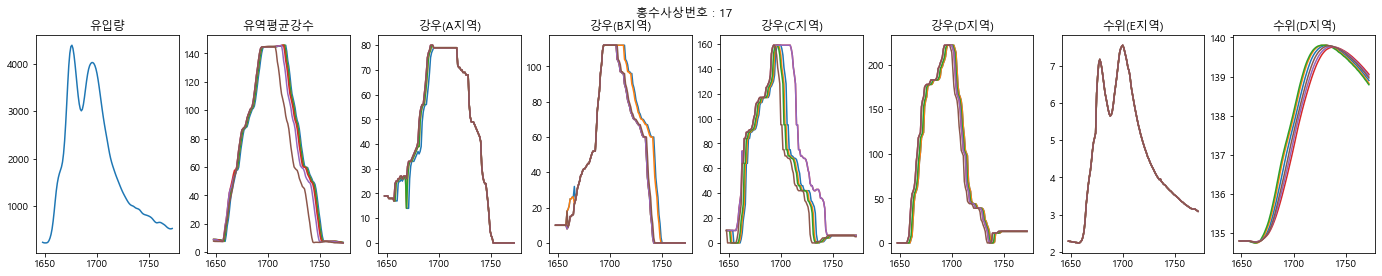

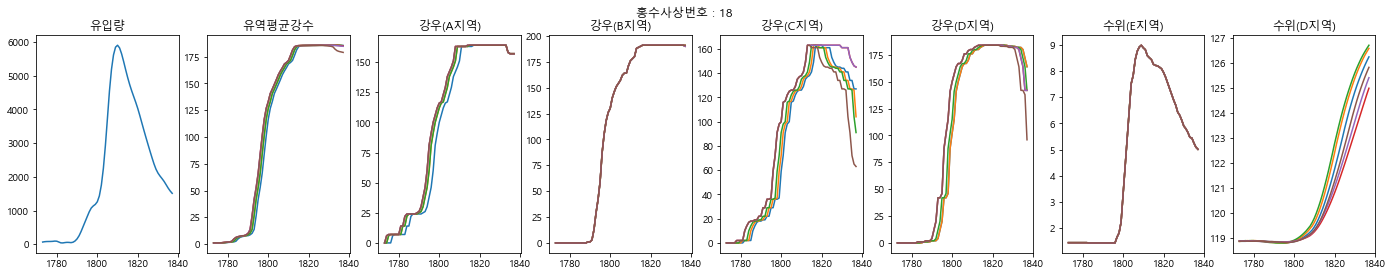

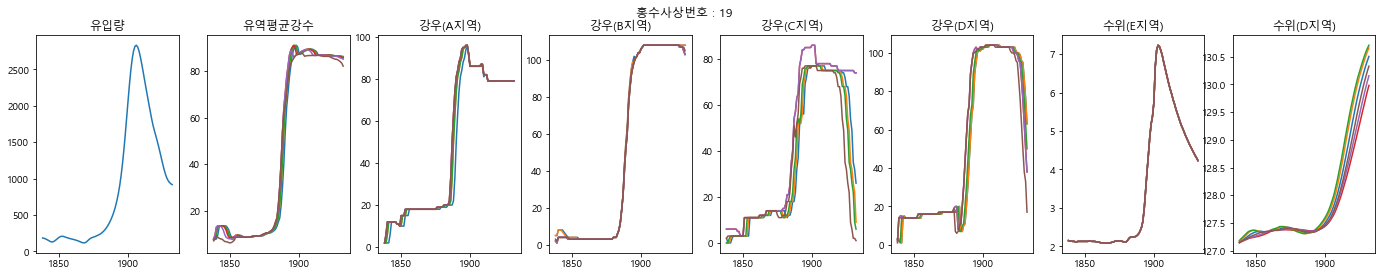

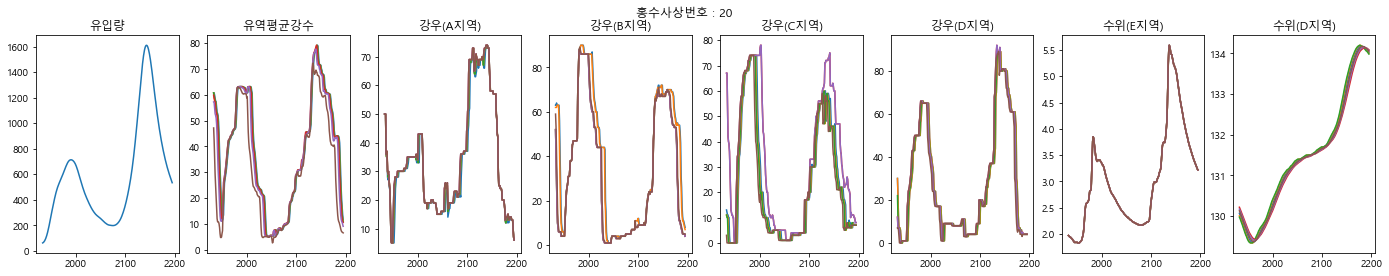

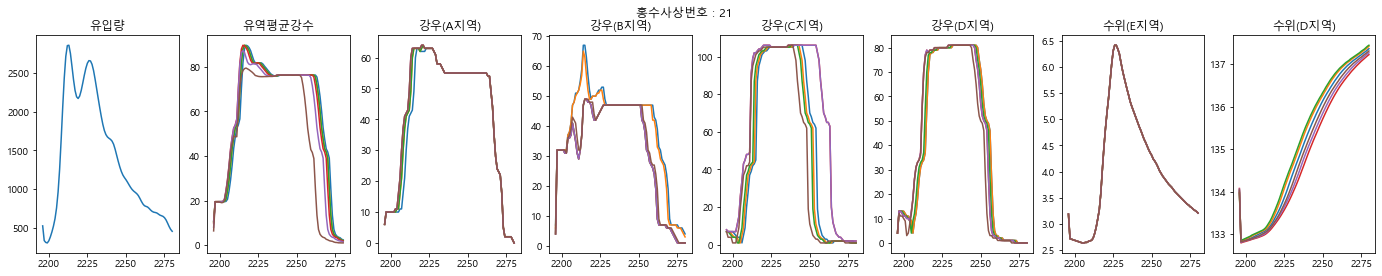

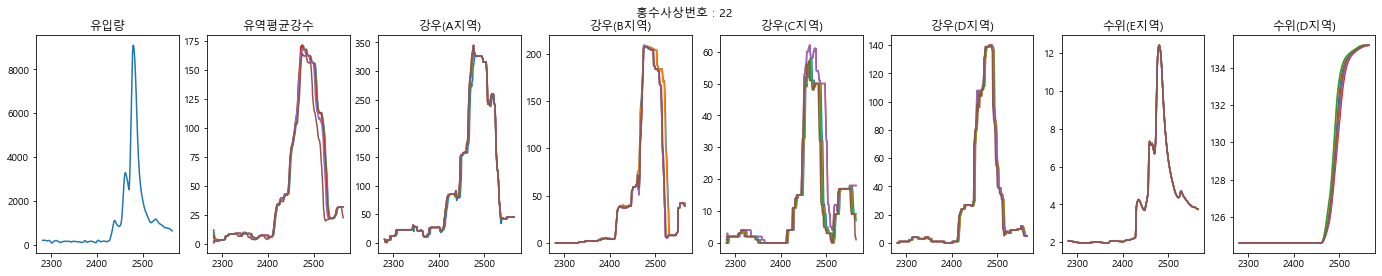

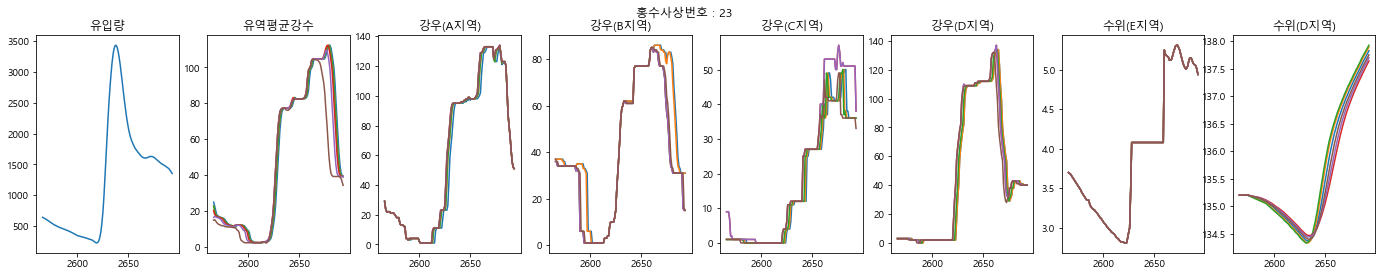

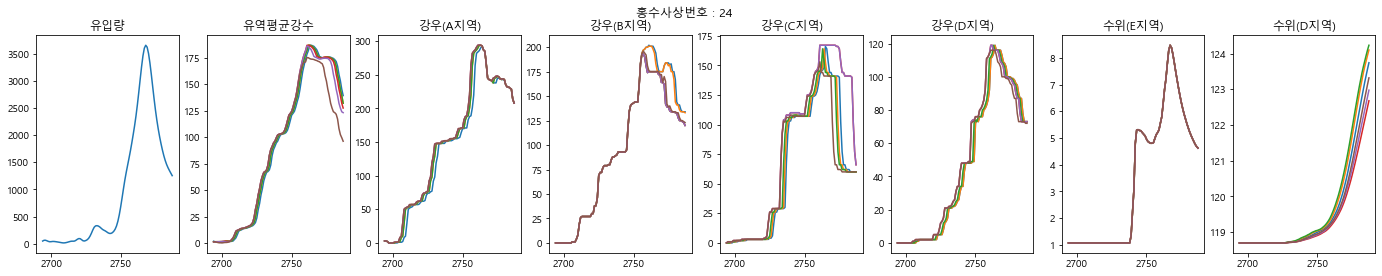

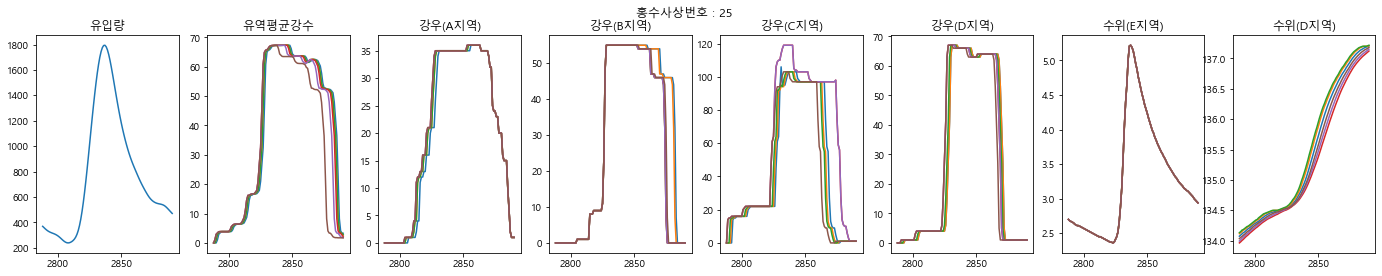

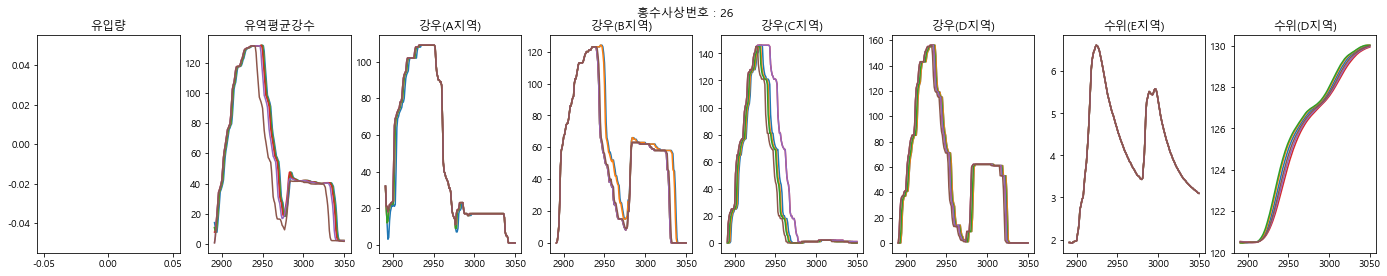

In [81]:
col_list = ['유입량','유역평균강수', '강우\(A지역\)', '강우\(B지역\)', 
            '강우\(C지역\)', '강우\(D지역\)', '수위\(E지역\)', '수위\(D지역\)']

n = 8
for num in data.홍수사상번호.unique():
    axe_list = []
    data_num = data[data.홍수사상번호 == num].copy()
    fig = plt.figure(figsize=(24,4))
    for i in range(n):
        axe_list.append(fig.add_subplot(1, n, i+1))
        data_num.filter(regex=col_list[i]).plot(ax=axe_list[i])
        axe_list[i].legend().set_visible(False)
        axe_list[i].set_title(col_list[i].replace("\\", ''))
    plt.suptitle(f'홍수사상번호 : {num}')
    plt.show()